<h2><center>Customer Segmentation project</center></h2>

<h4>In this project, I will try to figure out who the best customers are. I will look at the data in the following ways to answer that question:</h4>
<h4>1. Explore the general distribution of the data to get a sense of Male vs. Female customers, and how their income, age, and spending scores are similar or different.</h4>
<h4>2. Explore which gender has a higher income.</h4>
<h4>3. Explore which gender has a higher average spending score.</h4>

<h3>Preparation

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3>EDA</h3>

In [4]:
# check to see descriptive statistics 
customers.shape

(200, 5)

In [5]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From calling describe, we can see that there are no values to clean. Age looks pretty normally distributed, annual income in the thousands doesn't have outliers that are too excessive. Spending score is in fact between 1 and 100. Everything looks good.

Text(0.5, 1.0, 'Distribution of Genders')

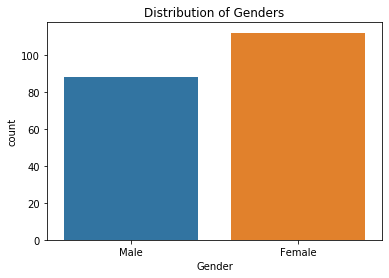

In [6]:
# see the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=customers)
plt.title('Distribution of Genders')

There are more women than men in this dataset.

Text(0.5, 0, 'Age')

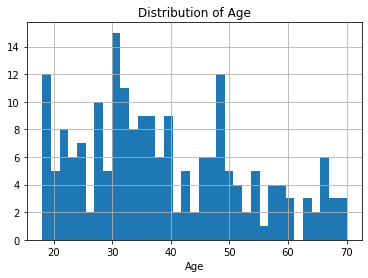

In [7]:
# histogram of ages
customers.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')

Age histogram is somewhat right-tailed. We saw that the average age was 38 as well, so this is not surprising. 
In addition, there is a spike in ages 48-49 and around 65 as well.

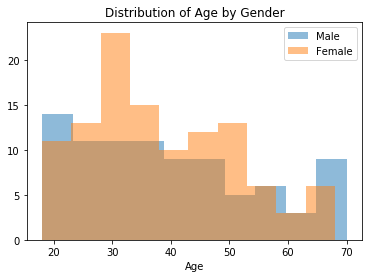

In [8]:
# Histogram of ages by gender
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label = 'Male')
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha = 0.5, label = 'Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

We can see two things here, one reflected ealier om the describe call:
    1. There are more women than men in this dataset.
    2. There are a lot of younger wowmen and middle-aged women

Text(0.5, 0, 'Thousands of Dollars')

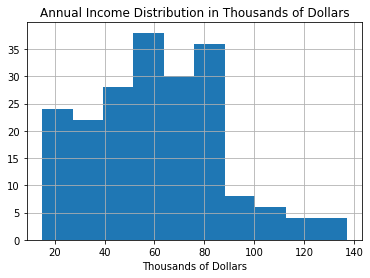

In [9]:
# Histogram of income
customers.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

The most frequent annual incomes are between around 50k and 85k,

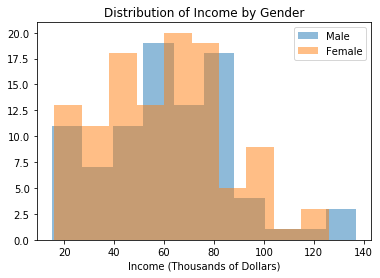

In [10]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend()

Majority of women and men have similar income distribution, and a large portion falls between 45k and 80k.

In [11]:
# Create dataesets by gender
male_customers = customers[customers['Gender'] =='Male']
female_customers = customers[customers['Gender'] == 'Female']

In [12]:
# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Women on average had a higher spending score by about 3 points.

Text(0.5, 1.0, 'Age to Income, Colored by Gender')

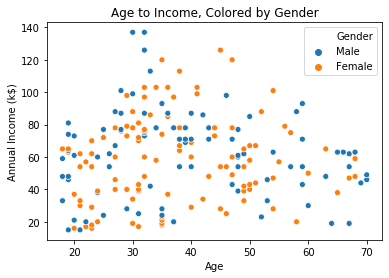

In [13]:
# Scatterplot Age to Income, colored by gender
sns.scatterplot('Age', 'Annual Income (k$)', hue = 'Gender', data = customers)
plt.title('Age to Income, Colored by Gender')

There is pretty much no correlation between age and income for neither men or women in this data. The correlation matrix below confirms this.

Text(0.5, 1, 'Heatmap Correlation of All Variables')

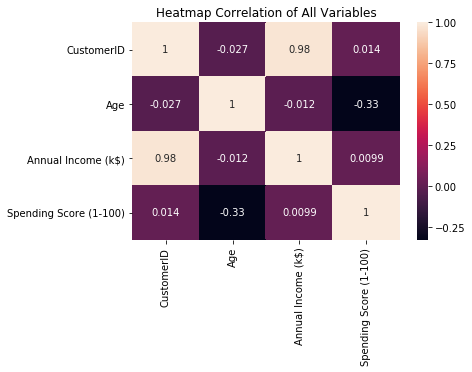

In [14]:
sns.heatmap(customers.corr(), annot=True)
plt.title('Heatmap Correlation of All Variables')

Text(0.5, 1.0, 'Age to Spending Score, Colored by Gender')

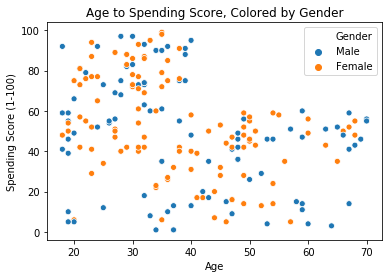

In [15]:
# Scatterplot Age to Spending score, colored by gender
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Age to Spending Score, Colored by Gender')

The above plot shows the negative correlation between age and spending score. It's not a strong association, but the older the person, the worse their spending score.

Text(0.5, 1, 'Correlation Heatmap - Female')

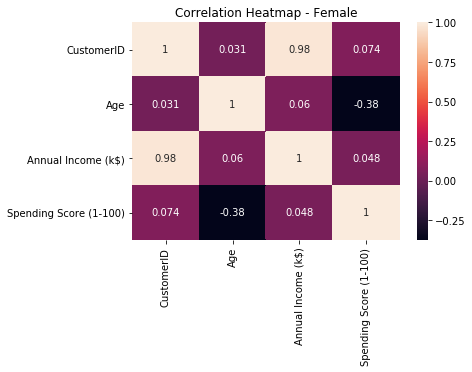

In [16]:
sns.heatmap(female_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Female')

Text(0.5, 1, 'Correlation Heatmap - Male')

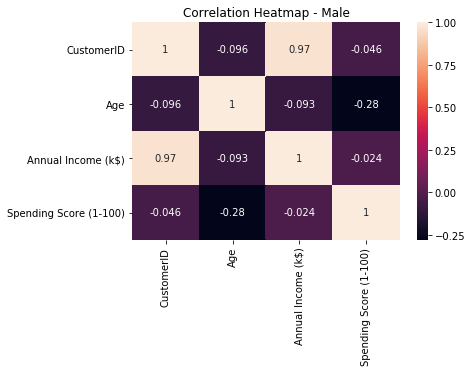

In [18]:
sns.heatmap(male_customers.corr(), annot=True)
plt.title('Correlation Heatmap - Male')

Comparing men to women reveals that there is a slightly higher correlation between age and spending score for women. 

Text(0.5, 1, 'Age tp Spending Score, Female Only')

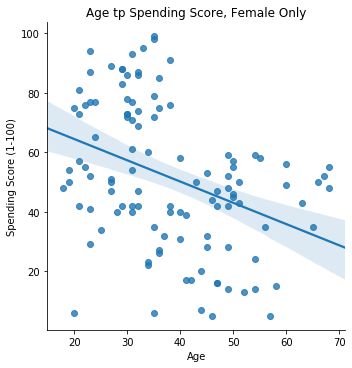

In [19]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers)
plt.title('Age tp Spending Score, Female Only')

Text(0.5, 1, 'Age tp Spending Score, Male Only')

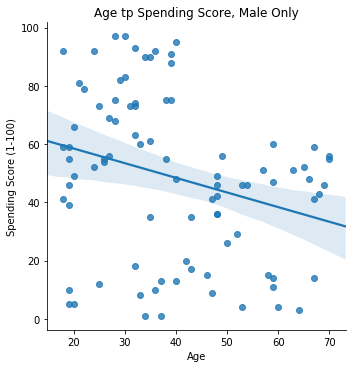

In [21]:
sns.lmplot('Age', 'Spending Score (1-100)', data=male_customers)
plt.title('Age tp Spending Score, Male Only')

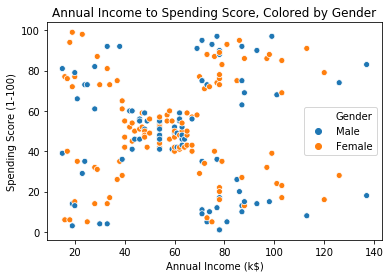

In [20]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');

Annual Income and Spending Score have somewhat related means and standard deviations, which is why we see this strange shape. But there is very low if no correlation here.
  
There are 5 rough clusters here:
1. Low income, low spending score
2. Low income, high spending score
3. Mid income, medium spending score
4. High income, low spending score
5. High income, high spending score

Interestingly, there are no high income, medium spending score points.

## Interpretation and Actions

### Based on these data, 
we can segragate customer into the five clusters shown above, which can be further segragated by gender (female or male) and age (40+ or 40-)

### the following tests could be carried out:

1. Marketing items different price-range to women to see if they purchase more frequently or more volume.

2. Marketing more to younger women because their spending score tends to be higher.

3. Thinking up new ways to target advertising, pricing, branding, etc. to the older women and man (40+)  who have lower spending scores.

4. Figure out a way to gather more data to build a data set that has more features.

### KPIs

define the following  as KPIs as an example to see if efforts are paying off or not. 
1. The change in frequency and volume of purchases by women after the introduction of more marketing campaigns targeting them.
2. The change in spending score after introducing marketing campaigns targeting younger women.
3. The change in spending score after introducing marketing campaigns targeting older women and men.